<a target="_blank" href="https://colab.research.google.com/github/jvictorferreira3301/PDS/blob/main/WavProcessing.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
<a href='https://github.com/jvictorferreira3301/PDS' target="_blank"><img alt='GitHub' src='https://img.shields.io/badge/Open_in Github-100000?style=plastic&logo=GitHub&logoColor=white&labelColor=black&color=black'/></a>
</a>

EC01045 - PROCESSAMENTO DIGITAL DE SINAIS (2024 .4 - T01)

Faculdade de Engenharia da Computação e Telecomunicações - Universidade Federal do Pará

Professor: Ronaldo de Freitas Zampolo 

Aluno: Joao Victor Santos Brito Ferreira

# Tarefa 2 - Visualização do sinal de áudio
Traçar gráficos do sinal de áudio da tarefa anterior no domínio do tempo e no domínio da frequência.

- Gráfico no domínio do tempo: no eixo horizontal deve estar representado o tempo, e no vertical teremos os valores do sinal discreto propriamente dito. Considere a frequência de amostragem usada a fim de representar os valores do eixto temporal em segundos.

- Gráfico no domínio da frequência: colocar no eixo horizontal a frequência discreta (unidade: rad/s) no intervalo [-π, π]; no eixo vertical, representar o módulo da transformada de Fourier.

Observações:

a) Se o sinal for estéreo, considerar apenas um dos canais.

## $I$. Importação das Bibliotecas


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftshift
from IPython.display import display, clear_output
import time as t
from tkinter import Tk
from tkinter.filedialog import askopenfilename

## $II$. Definição das funções

In [25]:
def plot_time_domain(sample_rate, data):
    """
    Plota o sinal de áudio no domínio do tempo.

    Parameters:
    sample_rate (int): Frequência de amostragem do sinal de áudio.
    data (numpy.ndarray): Dados do sinal de áudio.

    Returns:
    None
    """
    if len(data.shape) > 1:
        data = data[:, 0]
    
    # eixo temporal em segundos
    time = np.arange(len(data)) / sample_rate
    
    # plot do gráfico no tempo
    plt.figure(figsize=(12, 6))
    plt.plot(time, data)
    plt.title('Sinal de Áudio no Domínio do Tempo')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

def plot_frequency_domain(sample_rate, data):
    """
    Plota o sinal de áudio no domínio da frequência.

    Parameters:
    sample_rate (int): Frequência de amostragem do sinal de áudio.
    data (numpy.ndarray): Dados do sinal de áudio.

    Returns:
    None
    """
    if len(data.shape) > 1:
        data = data[:, 0]
    
    # fft do sinal
    N = len(data)
    yf = fft(data)
    xf = np.linspace(-np.pi, np.pi, N)
    
    # plot do gráfico na frequência
    plt.figure(figsize=(12, 6))
    plt.plot(xf, fftshift(np.abs(yf)))
    plt.title('Sinal de Áudio no Domínio da Frequência')
    plt.xlabel('Frequência (rad/s)')
    plt.ylabel('Magnitude')
    plt.grid()
    plt.show()

def main(wav_path):
    """
    Função principal para ler o arquivo .wav e plotar os gráficos no domínio do tempo e da frequência.

    Parameters:
    wav_path (str): Caminho do arquivo .wav.

    Returns:
    None
    """
    # Ler o arquivo .wav
    sample_rate, data = wavfile.read(wav_path)
    
    # Plotar
    plot_time_domain(sample_rate, data)
    plot_frequency_domain(sample_rate, data)

def selecionar_arquivo_local():
    """
    Abre uma janela de diálogo para selecionar um arquivo .wav localmente.

    Returns:
    str: Caminho do arquivo selecionado.
    """
    from tkinter import Tk
    from tkinter.filedialog import askopenfilename
    Tk().withdraw()  # Ocultar a janela principal do Tkinter
    arquivo = askopenfilename(filetypes=[("Arquivo WAV", "*.wav")])
    return arquivo

def upload_arquivo_colab():
    """
    Abre uma janela de diálogo para fazer upload de um arquivo .wav no Google Colab.

    Returns:
    str: Nome do arquivo carregado.
    """
    from google.colab import files
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename

## $III$. Importação do arquivo Wav

Nesse experimento foi utilizado [este áudio](https://github.com/jvictorferreira3301/PDS/blob/main/REMO.wav), mas ao rodar localmente ou colab o usuário pode importar outro arquivo no formato wav.

In [26]:
# Perguntar Colab ou localmente
uso_colab = input("Você está utilizando o Google Colab? (s/n): ").strip().lower()

if uso_colab == 's':
    # Fazer upload do arquivo no Colab
    from google.colab import files
    wav_path = upload_arquivo_colab()
else:
    # Selecionar o arquivo localmente
    wav_path = selecionar_arquivo_local()

## $IV$. Análise com gráfico dinâmico 

O áudio é processado em blocos menores (no codigo chamado de `chunks`), e os gráficos do tempo e da frequência são atualizados continuamente, permitindo observar mudanças na amplitude e no espectro em tempo real, ideal para sinais não estacionários como fala e música.

- Análise de fala: Na fala humana, os sons mudam rapidamente. A análise dinâmica permite observar como diferentes fonemas se distribuem no tempo.

- Monitoramento de vibrações: Em engenharia, sinais de vibração podem ser analisados para detectar falhas em máquinas.

- Reconhecimento de notas musicais: Em áudio de instrumentos musicais, a análise dinâmica pode identificar mudanças na frequência de cada nota tocada.

- Processamento em tempo real: Em sistemas de streaming de áudio ou sonares, a FFT dinâmica permite análise contínua do sinal.

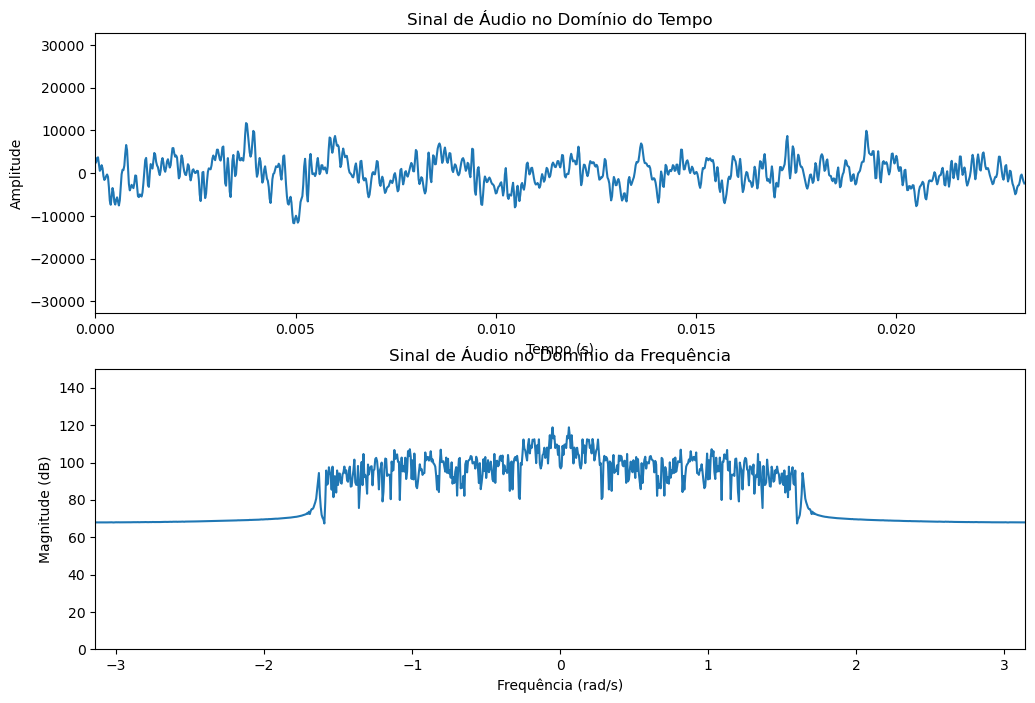

In [29]:
# Ler o arquivo .wav
sample_rate, data = wavfile.read(wav_path)

# Se o áudio tiver mais de um canal, considerar apenas um dos canais
if len(data.shape) > 1:
    data = data[:, 0]

# Configurações de áudio
CHUNK = 1024  # Tamanho do bloco de áudio
current_frame = 0

# Configurar a figura do matplotlib
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Configurar o gráfico no domínio do tempo
x_time = np.arange(0, CHUNK) / sample_rate
line_time, = ax1.plot(x_time, np.zeros(CHUNK))
ax1.set_title('Sinal de Áudio no Domínio do Tempo')
ax1.set_xlabel('Tempo (s)')
ax1.set_ylabel('Amplitude')
ax1.set_xlim(0, CHUNK / sample_rate)
ax1.set_ylim(-32768, 32767)

# Configurar o gráfico no domínio da frequência
x_freq = np.linspace(-np.pi, np.pi, CHUNK)
line_freq, = ax2.plot(x_freq, np.zeros(CHUNK))
ax2.set_title('Sinal de Áudio no Domínio da Frequência')
ax2.set_xlabel('Frequência (rad/s)')
ax2.set_ylabel('Magnitude (dB)')
ax2.set_xlim(-np.pi, np.pi)
ax2.set_ylim(0, 150)

print("Análise de Espectro - Loop infinito, pare com CTRL + C ...")
try:
    while current_frame + CHUNK < len(data):
        # Obter o bloco de dados atual
        block = data[current_frame:current_frame + CHUNK]
        current_frame += CHUNK

        # Atualizar gráfico no domínio do tempo
        line_time.set_ydata(block)
        
        # Calcular a transformada de Fourier
        yf = fft(block)
        magnitude = 20 * np.log10(np.abs(yf) + 1e-6)  # Escala logarítmica (dB)
        line_freq.set_ydata(fftshift(magnitude))
        
        # Atualizar os gráficos
        display(fig)
        t.sleep(0.01)
        clear_output(wait=True)

except KeyboardInterrupt:
    print("Parando Análise de Espectro...")
finally:
    plt.close(fig)

### Fluxo básico

- O áudio é lido em blocos de tamanho 1024 amostras (os ditos chunks).

- Para cada bloco, é atualizado o gráfico do domínio do tempo com os valores do trecho atual.

- A FFT é recalculada para mostrar a distribuição de frequência daquele bloco específico.

- O processo se repete continuamente, atualizando os gráficos em tempo real.


## $V$. Análise com gráfico estático 

Nesse caso, o sinal de áudio é carregado por completo, e são gerados gráficos fixos do domínio do tempo e da frequência, permitindo uma visão geral do comportamento do som, útil para sinais estacionários ou que não variam muito ao longo do tempo. Abaixo separei algumas aplicações:

- Análise de música: Para identificar a estrutura geral de uma música, como se há predominância de baixas ou altas frequências.

- Detecção de ruído: Se um sinal contém ruído em certas faixas de frequência, a FFT pode evidenciar isso.

- Reconhecimento de padrões: Em áudio de ECG (sinais cardíacos), a análise estática pode ajudar a detectar anomalias.

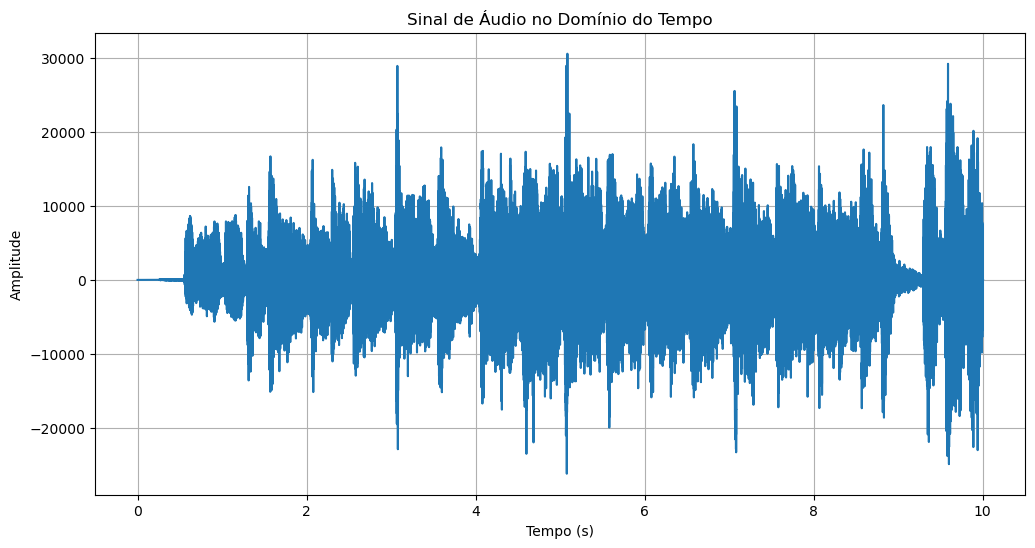

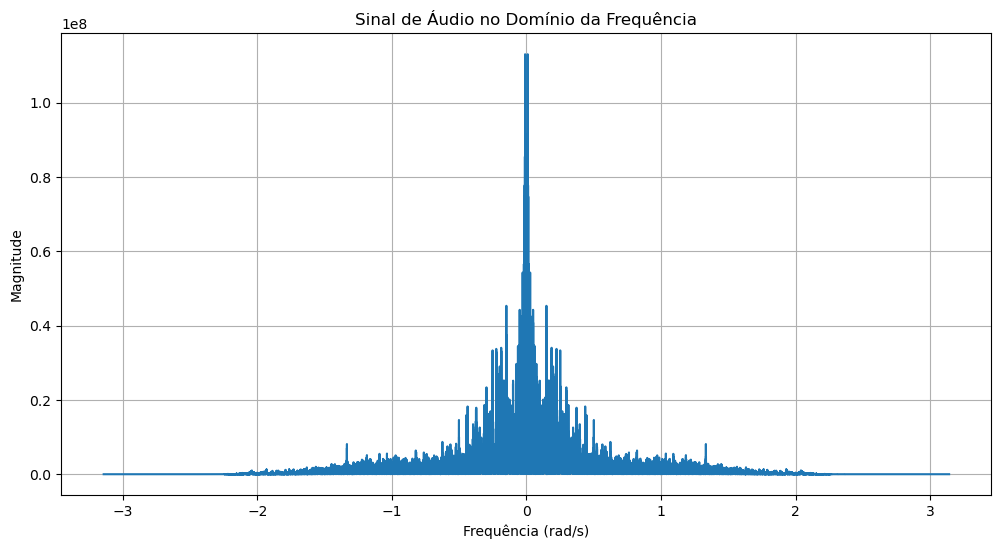

In [28]:
# Executar a função principal
main(wav_path)

### Fluxo básico

- O sinal é lido do arquivo .wav.

- Se for estéreo, apenas um canal é considerado.

- O gráfico do domínio do tempo exibe a amplitude do sinal ao longo do tempo.

- A Transformada de Fourier (FFT) é calculada para visualizar a composição espectral do sinal.